In [1]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')

import scipy.io
import numpy as np 
import os 
import scipy.misc 
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline  
print ("Packages loaded")

Packages loaded


In [2]:
def net(data_path, input_image):
    layers = (
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1',
        'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3',
        'relu3_3', 'conv3_4', 'relu3_4', 'pool3',
        'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3',
        'relu4_3', 'conv4_4', 'relu4_4', 'pool4',
        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3',
        'relu5_3', 'conv5_4', 'relu5_4'
    )
    data = scipy.io.loadmat(data_path)
    mean = data['normalization'][0][0][0]
    mean_pixel = np.mean(mean, axis=(0, 1))
    weights = data['layers'][0]
    net = {}
    current = input_image
    for i, name in enumerate(layers):
        kind = name[:4]
        if kind == 'conv':
            kernels, bias = weights[i][0][0][0][0]
            # matconvnet: weights are [width, height, in_channels, out_channels]
            # tensorflow: weights are [height, width, in_channels, out_channels]
            kernels = np.transpose(kernels, (1, 0, 2, 3))
            bias = bias.reshape(-1)
            current = _conv_layer(current, kernels, bias)
        elif kind == 'relu':
            current = tf.nn.relu(current)
        elif kind == 'pool':
            current = _pool_layer(current)
        net[name] = current
    assert len(net) == len(layers)
    return net, mean_pixel, layers
print ("Network for VGG ready")

Network for VGG ready


In [3]:
def _conv_layer(input, weights, bias):
    conv = tf.nn.conv2d(input, tf.constant(weights), strides=(1, 1, 1, 1),
            padding='SAME')
    return tf.nn.bias_add(conv, bias)
def _pool_layer(input):
    return tf.nn.max_pool(input, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1),
            padding='SAME')
def preprocess(image, mean_pixel):
    return image - mean_pixel
def unprocess(image, mean_pixel):
    return image + mean_pixel
def imread(path):
    return scipy.misc.imread(path).astype(np.float)
def imsave(path, img):
    img = np.clip(img, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, img)
print ("Functions for VGG ready")

Functions for VGG ready



[1/36] conv1_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 225, 225, 64)


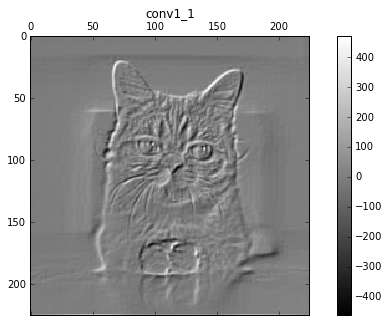

[2/36] relu1_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 225, 225, 64)


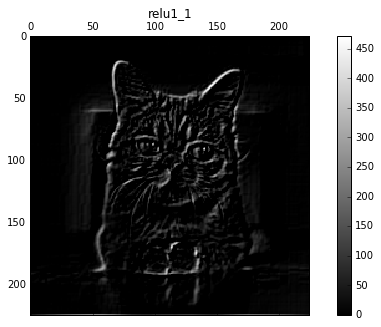

[3/36] conv1_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 225, 225, 64)


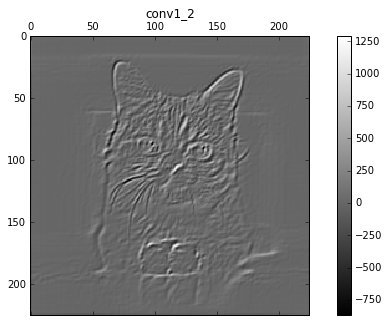

[4/36] relu1_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 225, 225, 64)


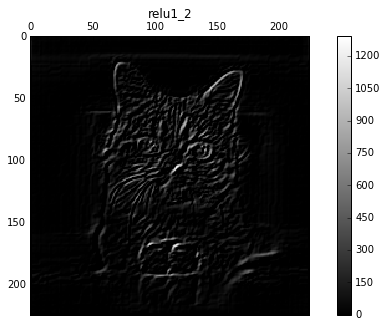

[5/36] pool1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 113, 113, 64)


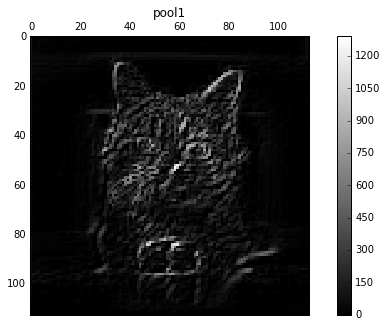

[6/36] conv2_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 113, 113, 128)


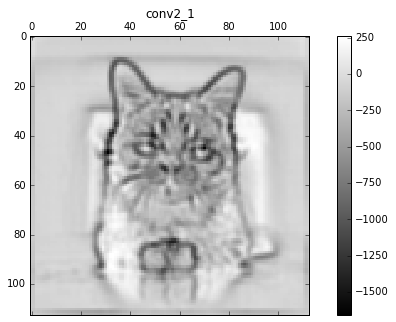

[7/36] relu2_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 113, 113, 128)


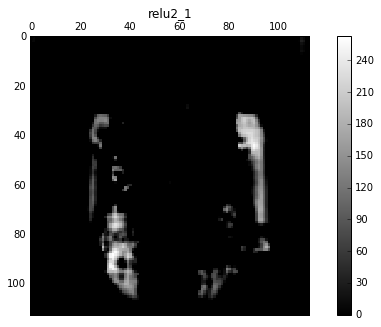

[8/36] conv2_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 113, 113, 128)


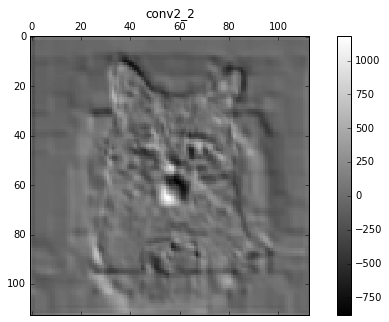

[9/36] relu2_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 113, 113, 128)


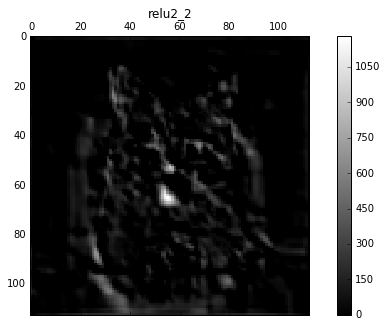

[10/36] pool2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 128)


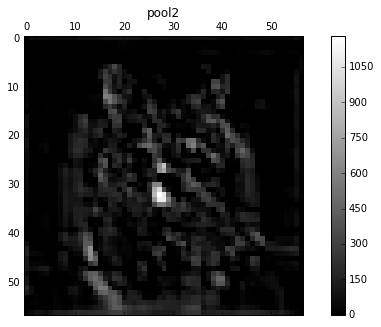

[11/36] conv3_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


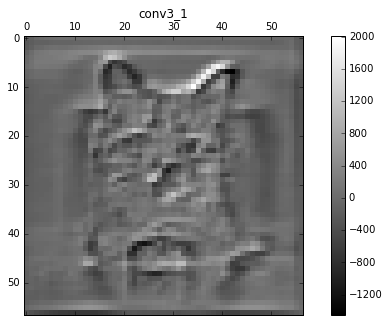

[12/36] relu3_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


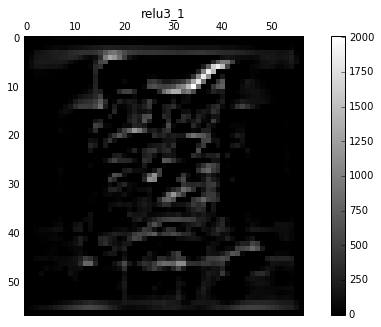

[13/36] conv3_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


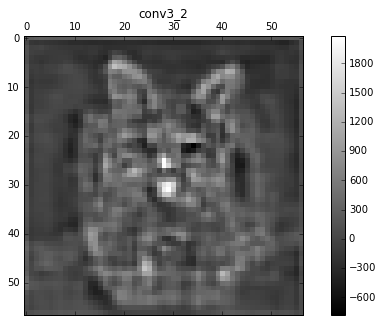

[14/36] relu3_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


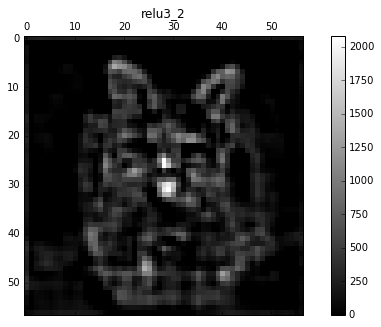

[15/36] conv3_3
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


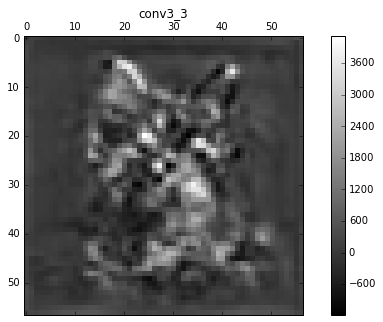

[16/36] relu3_3
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


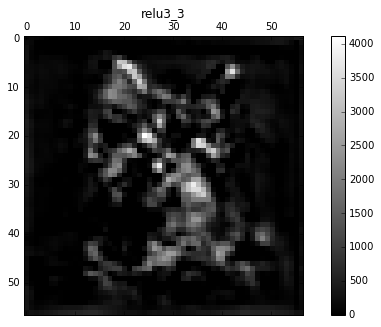

[17/36] conv3_4
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


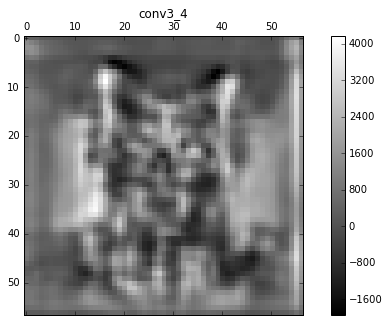

[18/36] relu3_4
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 57, 57, 256)


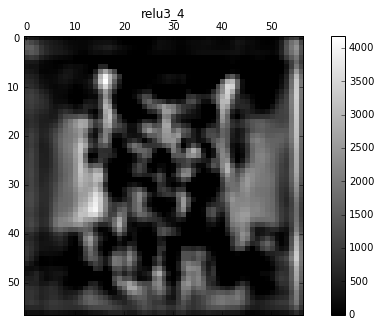

[19/36] pool3
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 256)


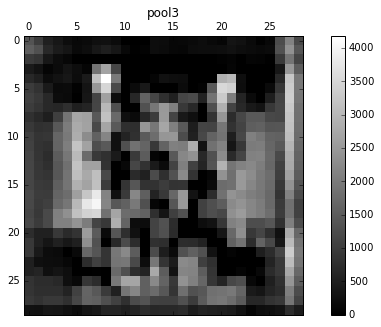

[20/36] conv4_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


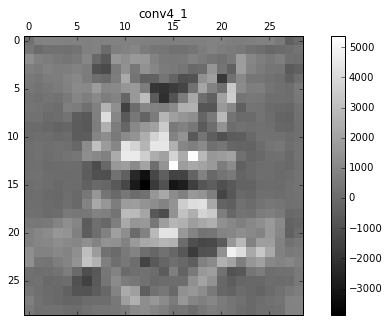

[21/36] relu4_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


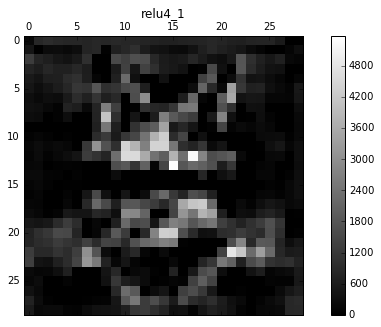

[22/36] conv4_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


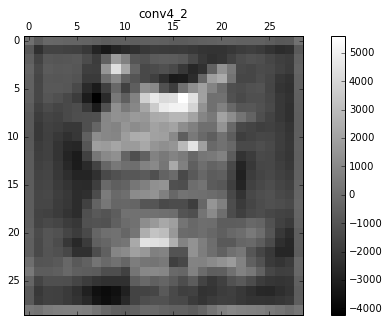

[23/36] relu4_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


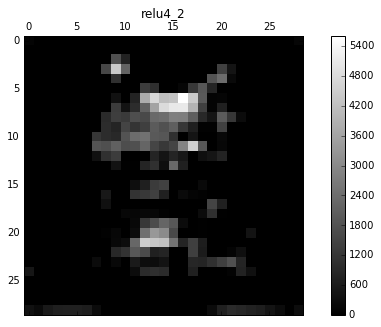

[24/36] conv4_3
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


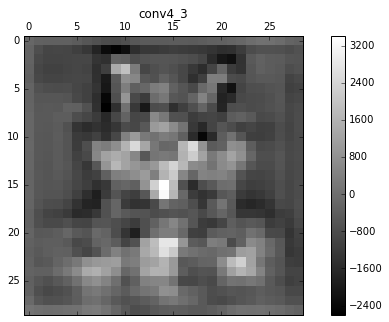

[25/36] relu4_3
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


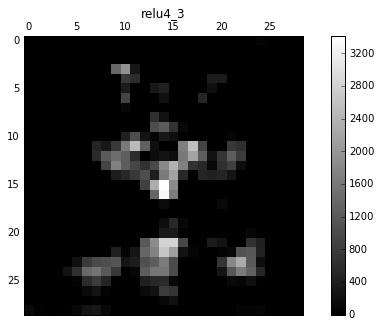

[26/36] conv4_4
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


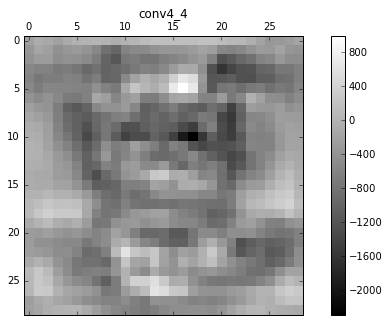

[27/36] relu4_4
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 29, 29, 512)


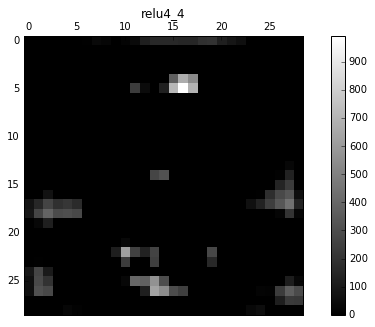

[28/36] pool4
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


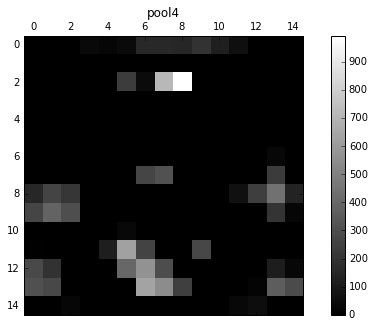

[29/36] conv5_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


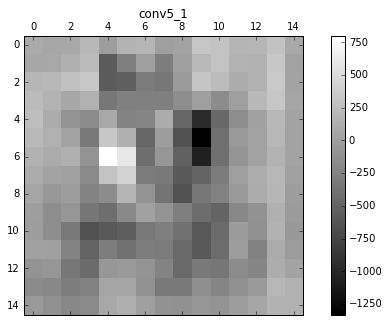

[30/36] relu5_1
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


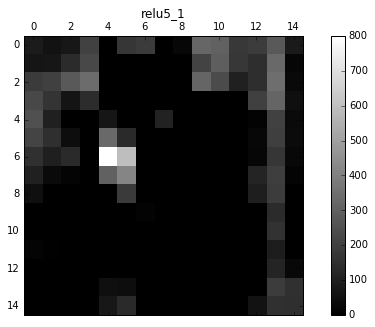

[31/36] conv5_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


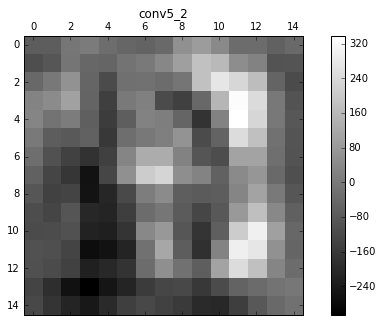

[32/36] relu5_2
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


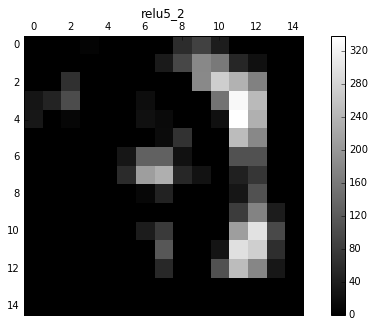

[33/36] conv5_3
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


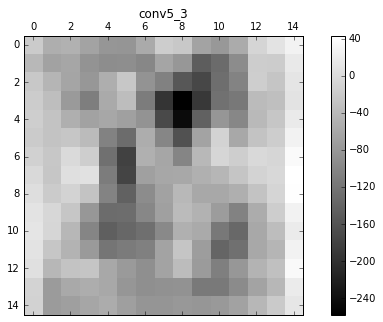

[34/36] relu5_3
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


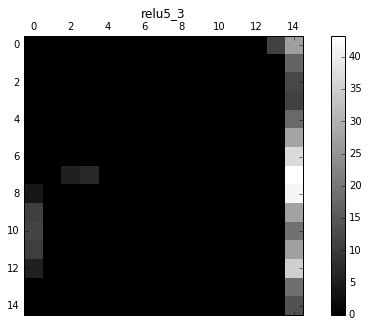

[35/36] conv5_4
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


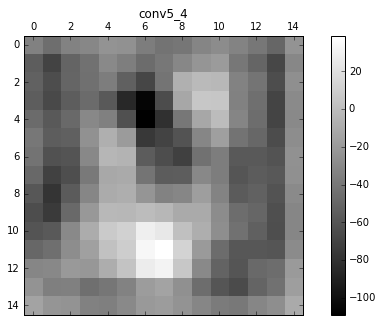

[36/36] relu5_4
<class 'tensorflow.python.framework.ops.Tensor'>
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 15, 15, 512)


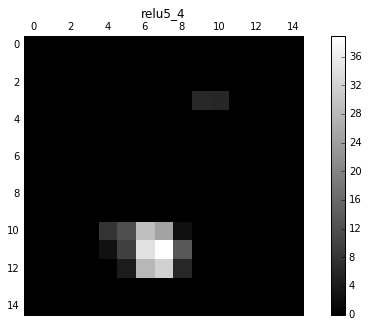

In [5]:
cwd  = "/home/ubuntu/work/data/tensor101"
VGG_PATH = cwd + "/imagenet-vgg-verydeep-19.mat"
IMG_PATH = cwd + "/images/cats/images (1).jpeg"
input_image = imread(IMG_PATH)
shape = (1,) + input_image.shape # (h, w, nch) =>  (1, h, w, nch) 
with tf.Graph().as_default(), tf.Session() as sess:
    image = tf.placeholder('float', shape=shape)
    nets, mean_pixel, all_layers = net(VGG_PATH, image)
    input_image_pre = np.array([preprocess(input_image, mean_pixel)])
    layers = all_layers # For all layers 
    # layers = ('relu2_1', 'relu3_1', 'relu4_1'...)
    
    print 
    for i, layer in enumerate(layers):
        print "[%d/%d] %s" % (i+1, len(layers), layer)
        print type(nets[layer])       
        #eval function애서 오류 발생, 동작하는 구조와 의미는?
        features = nets[layer].eval(feed_dict={image: input_image_pre})
        print " Type of 'features' is ", type(features)
        print " Shape of 'features' is %s" % (features.shape,)
        # Plot response 
        if 1:
            plt.figure(i+1, figsize=(10, 5))
            plt.matshow(features[0, :, :, 0], cmap=plt.cm.gray, fignum=i+1)
            plt.title("" + layer)
            plt.colorbar()
            plt.show()